<a href="https://colab.research.google.com/github/eadewusic/Formative-2_Data-Preprocessing/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif, f_regression

In [2]:
# Load the dataset
data = pd.read_csv("final_customer_data_group1.csv")

In [4]:
# Check for duplicates
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Check for unique categories in categorical columns
print("Unique values in product_category:")
print(data["product_category"].unique())

# Validate column relationships (e.g., purchase_amount > 0)
invalid_transactions = data[data["purchase_amount"] <= 0]
print(f"Number of invalid transactions: {len(invalid_transactions)}")


Number of duplicate rows: 2
Unique values in product_category:
['Clothing' 'Books' 'Groceries' 'Electronics' 'Sports']
Number of invalid transactions: 0


In [5]:
# Drop duplicate rows
data_cleaned = data.drop_duplicates()
print("Duplicate rows removed!")

Duplicate rows removed!


In [10]:
# Summary statistics for numerical columns
summary_stats = data_cleaned.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
       customer_id_legacy  purchase_amount  customer_rating  engagement_score  \
count          394.000000       394.000000       394.000000        394.000000   
mean           149.434010       280.203606         2.870686         58.875635   
std             31.894977       112.642120         1.401576         34.411627   
min            100.000000        51.000000         0.000000          0.000000   
25%            122.250000       192.000000         1.665363         52.000000   
50%            150.000000       271.025939         3.000000         73.000000   
75%            183.750000       386.929486         4.002077         84.500000   
max            199.000000       495.227576         5.000000         99.000000   

       purchase_interest_score  days_since_purchase  rolling_avg_3  \
count               394.000000           394.000000     394.000000   
mean                  2.511421            76.307107     278.192467   
std                   1.714493          

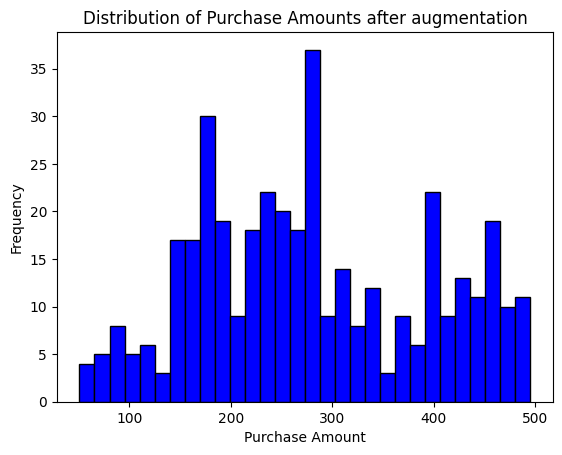

In [24]:
import matplotlib.pyplot as plt

# Histogram for purchase_amount
plt.hist(data_cleaned["purchase_amount"], bins=30, edgecolor="black", color="blue")
plt.title("Distribution of Purchase Amounts after augmentation")
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")
plt.show()

#still need to do the graph for before augmentation after the merge

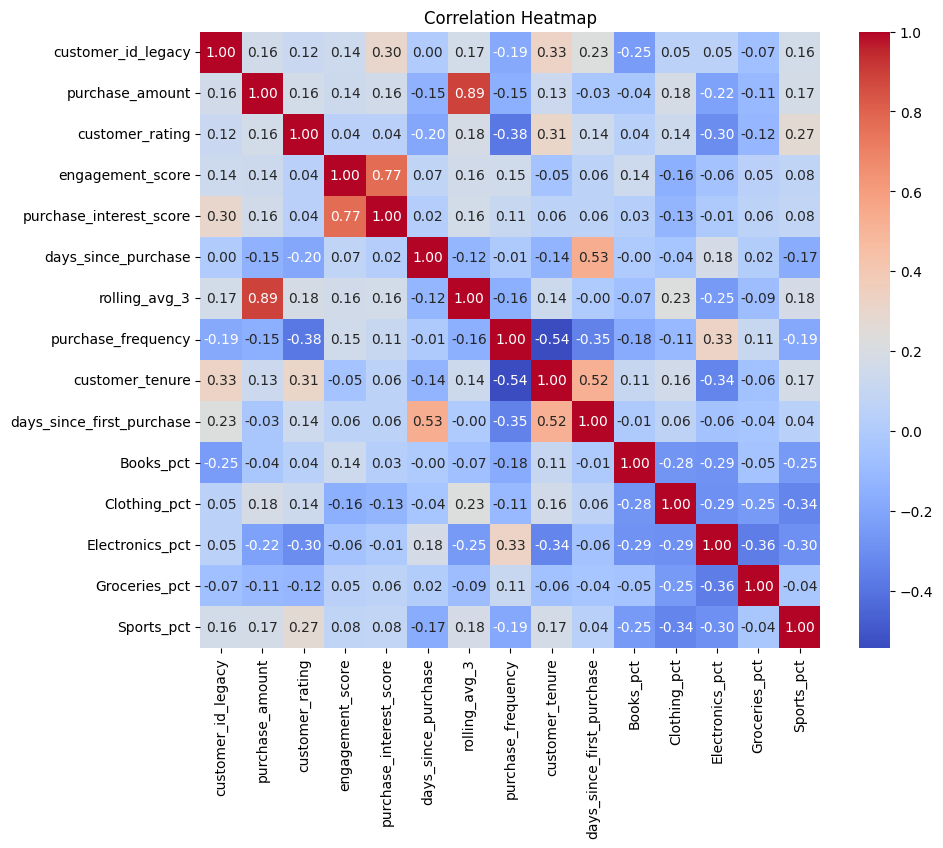

In [15]:

# Select only numerical columns for correlation analysis
numerical_data = data_cleaned.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Feature Selection
*pick just one during merge

In [18]:
#USING SELECTKBEST

# Define features (X) and target (y)
X = numerical_data.drop(columns=["purchase_amount"])  # Drop the target column
y = numerical_data["purchase_amount"]

# Initialize the SelectKBest feature selector
selector = SelectKBest(score_func=f_regression, k=10)  # Choose top 10 features

# Fit the selector to the data
X_new = selector.fit_transform(X, y)

# Get the names of selected features
selected_features = X.columns[selector.get_support()]
print("Top 10 Features Selected:")
print(selected_features)


Top 10 Features Selected:
Index(['customer_id_legacy', 'customer_rating', 'engagement_score',
       'purchase_interest_score', 'days_since_purchase', 'rolling_avg_3',
       'purchase_frequency', 'Clothing_pct', 'Electronics_pct', 'Sports_pct'],
      dtype='object')


In [21]:
from sklearn.linear_model import Lasso
import numpy as np

# Initialize Lasso model with a regularization strength
lasso = Lasso(alpha=0.01, random_state=42)

# Fit the Lasso model on the data
lasso.fit(X, y)

# Get feature importance (coefficients)
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns)

# Sort features by absolute coefficient value
top_10_features = lasso_coefficients.abs().sort_values(ascending=False).head(10).index
print("Top 10 Features Selected via Lasso:")
print(top_10_features)

# Filter the dataset to include only the top 10 features
X_top_10 = X[top_10_features]


Top 10 Features Selected via Lasso:
Index(['purchase_interest_score', 'rolling_avg_3', 'customer_rating',
       'purchase_frequency', 'Books_pct', 'engagement_score', 'Groceries_pct',
       'Sports_pct', 'customer_id_legacy', 'days_since_purchase'],
      dtype='object')


In [22]:
#USING RECURSIVE FEATURE ELIMINATION

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize the model and RFE selector
model = LinearRegression()
rfe_selector = RFE(estimator=model, n_features_to_select=10, step=1)

# Fit the selector to the data
rfe_selector.fit(X, y)

# Get the names of selected features
selected_features_rfe = X.columns[rfe_selector.support_]
print("Top 10 Features Selected via RFE:")
print(selected_features_rfe)


Top 10 Features Selected via RFE:
Index(['customer_id_legacy', 'customer_rating', 'engagement_score',
       'purchase_interest_score', 'rolling_avg_3', 'purchase_frequency',
       'days_since_first_purchase', 'Books_pct', 'Groceries_pct',
       'Sports_pct'],
      dtype='object')


In [25]:
# Save the cleaned and processed dataset
data_cleaned.to_csv("final_dataset_ready_group18.csv", index=False)

print("Final dataset saved successfully as 'final_dataset_ready_group18.csv'!")


Final dataset saved successfully as 'final_dataset_ready_group18.csv'!
